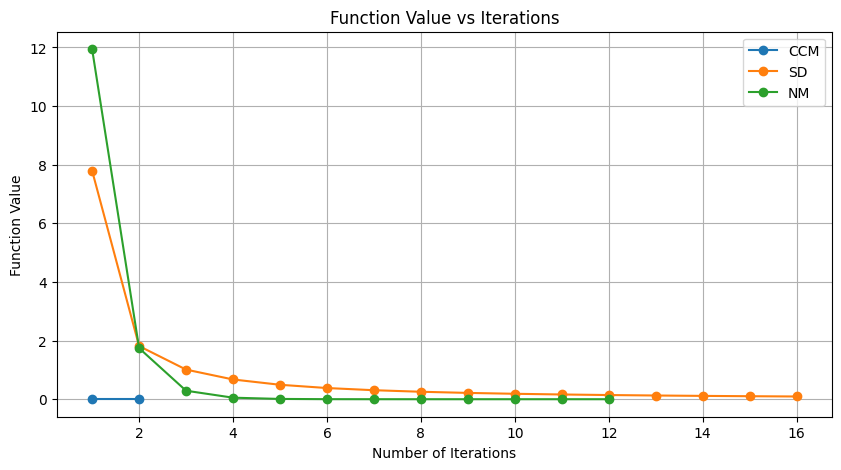

Results saved to optimization_results1.pdf


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def f(x1, x2):
    return (x1**3 - x2)**2 + 2 * (x2 - x1)**4

def grad_f(x1, x2):
    df_dx1 = 6 * (x1**3 - x2) * x1**2 - 8 * (x2 - x1)**3
    df_dx2 = -2 * (x1**3 - x2) + 8 * (x2 - x1)**3
    return np.array([df_dx1, df_dx2])

def hessian_f(x1, x2):
    d2f_dx1dx1 = 18 * x1**4 - 12 * x1**2 * x2 + 24 * (x2 - x1)**2
    d2f_dx2dx2 = 2 + 24 * (x2 - x1)**2
    d2f_dx1dx2 = -6 * x1**2 - 24 * (x2 - x1)**2
    return np.array([[d2f_dx1dx1, d2f_dx1dx2], [d2f_dx1dx2, d2f_dx2dx2]])

def optimize(method, x0, tol_f=0.001, tol_x=0.01, max_iter=1000):
    x = np.array(x0, dtype=float)
    iterations_data = []
    method_names = {"CCM": "Cyclic Coordinate Method", "SD": "Steepest Descent", "NM": "Newton's Method"}
    method_full = method_names[method]
    
    for k in range(max_iter):
        f_k = f(*x)
        prev_x = np.copy(x)
        
        if method == "CCM":
            for i in range(2):
                e_i = np.zeros(2)
                e_i[i] = 1
                alpha = 0.01  # Step size
                while f(*(x + alpha * e_i)) < f(*x):
                    x += alpha * e_i
                while f(*(x - alpha * e_i)) < f(*x):
                    x -= alpha * e_i
        elif method == "SD":
            grad = grad_f(*x)
            alpha = 0.01  # Step size
            x -= alpha * grad
        elif method == "NM":
            grad = grad_f(*x)
            hessian = hessian_f(*x)
            try:
                delta_x = np.linalg.solve(hessian, -grad)
                x += delta_x
            except np.linalg.LinAlgError:
                break
        
        f_k1 = f(*x)
        iterations_data.append([method_full, k+1, f_k1])
        
        # Check stopping conditions
        if abs(f_k1 - f_k) / abs(f_k) < tol_f or np.linalg.norm(x - prev_x) < tol_x:
            break
    
    return x, k+1, f(*x), iterations_data

# Initial point
x0 = [2, 0]

# Run optimization methods
x_ccm, iter_ccm, f_ccm, data_ccm = optimize("CCM", x0)
x_sd, iter_sd, f_sd, data_sd = optimize("SD", x0)
x_nm, iter_nm, f_nm, data_nm = optimize("NM", x0)

# Save results to a text file
with open("optimization_results.txt", "w") as file:
    file.write("Optimization Results\n")
    file.write("====================\n\n")
    for method, data in zip(["CCM", "SD", "NM"], [data_ccm, data_sd, data_nm]):
        file.write(f"Method: {method}\n")
        for row in data:
            file.write(f"Iteration {row[1]}: Function Value = {row[2]:.6f}\n")
        file.write("\n")
    file.write("Final Summary\n")
    file.write("============\n")
    file.write(f"Cyclic Coordinate Method: x = ({x_ccm[0]:.6f}, {x_ccm[1]:.6f}), f(x) = {f_ccm:.6f}, Iterations = {iter_ccm}\n")
    file.write(f"Steepest Descent: x = ({x_sd[0]:.6f}, {x_sd[1]:.6f}), f(x) = {f_sd:.6f}, Iterations = {iter_sd}\n")
    file.write(f"Newton's Method: x = ({x_nm[0]:.6f}, {x_nm[1]:.6f}), f(x) = {f_nm:.6f}, Iterations = {iter_nm}\n")

# Plot function values over iterations
plt.figure(figsize=(10, 5))
for method, data in zip(["CCM", "SD", "NM"], [data_ccm, data_sd, data_nm]):
    iterations = [row[1] for row in data]
    values = [row[2] for row in data]
    plt.plot(iterations, values, marker='o', label=method)
plt.xlabel("Number of Iterations")
plt.ylabel("Function Value")
plt.title("Function Value vs Iterations")
plt.legend()
plt.grid()
plt.show()

print("Results saved to optimization_results1.pdf")
